<b>¡Hola Natalia!</b>

Mi nombre es Alejandro Abia y tengo el gusto de revisar tu proyecto.

A continuación, encontrarás mis comentarios en celdas pintadas de tres colores (verde, amarillo y rojo), a manera de semáforo. Por favor, <b>no las borres ni muevas de posición</b> mientras dure el proceso de revisión.

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
En celdas verdes encontrarás comentarios en relación a tus aciertos y fortalezas.
</div>
<div class="alert alert-block alert-warning">
<b>Antención</b> <a class="tocSkip"></a>
Utilizaré el color amarillo para llamar tu atención, expresar algo importante o compartirte alguna idea de valor.
</div>
<div class="alert alert-block alert-danger">
<b>A resolver</b> <a class="tocSkip"></a>
En rojo emitiré aquellos puntos que deberás atender para aprobar la revisión.
</div>
<div class="alert alert-block alert-info">
<b>Comentario estudiante</b><a class="tocSkip"></a>
Es factible que, a lo largo del proceso de revisión, quieras dejarme comentarios. Si es el caso, por favor realízalo dentro de celdas azules como esta.
</div>
Respecto del proceso de revisión, tu proyecto será aceptado una vez que los comentarios en rojo hayan sido atendidos.
¡Empecemos!

# Proyecto del Módulo 2: Análisis de comportamiento del Usuario

## Introducción


En este proyecto, analizamos el comportamiento de los usuarios en la aplicación de una empresa de productos alimenticios, con un enfoque en el embudo de conversión y los resultados de un experimento A/A/B.

Primero, evaluamos el embudo de eventos para identificar cuántos usuarios avanzan en cada etapa del proceso de compra y en qué puntos se produce la mayor pérdida de usuarios. Luego, realizamos un test A/A/B para determinar si un cambio en la tipografía de la aplicación afecta la interacción de los usuarios. Para ello, comparamos la frecuencia de eventos clave en dos grupos de control y un grupo de prueba utilizando pruebas de hipótesis estadísticas.



### Objetivo

Verificar la validez del experimento y determinar si la nueva tipografía tiene un impacto significativo en el comportamiento de los usuarios.

## Exploración y corrección de datos

In [1]:
# Importacion de librerias
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import numpy as np

In [2]:
# Lectura de los archivos
data = pd.read_csv('/datasets/logs_exp_us.csv', sep="\t" )


In [3]:
#Información de los datasets
data.info()
print()
display(data.describe())
print()
display(data. head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB



,DeviceIDHash,EventTimestamp,ExpId
count,2.441260e+05,2.441260e+05,244126.000000
mean,4.627568e+18,1.564914e+09,247.022296
std,2.642425e+18,1.771343e+05,0.824434
min,6.888747e+15,1.564030e+09,246.000000
25%,2.372212e+18,1.564757e+09,246.000000
50%,4.623192e+18,1.564919e+09,247.000000
75%,6.932517e+18,1.565075e+09,248.000000
max,9.222603e+18,1.565213e+09,248.000000


,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


Los datos nos muestran las acciones que tomaron los clientes. La columna EventName muestra el evento, la columna DeviceIDHash es un identificador de usuario, el EventTimestamp muestra la hora en la que pasó y el ExpID muestra a qué grupo pertenecen en la prueba A/A/B. Se puede ver que no hay datos nulos en ninguna columna.
Para preparar estos datos para el análisis es necesario comprobar la exsistencia de duplicados, cambiar los nombres de las columnas a snake_case para tener mejor estructura, cambiar el tipo de datos del Timestamp a tipo datetime y separar la fecha de la hora. 


### Limpieza y corrección de datos

In [4]:
#Duplicados
print("Duplicados en Data: ", data.duplicated().sum())
print()
data.drop_duplicates(inplace = True)

#cambiar nombres de columnas
data.columns= ['event_name','device_id','timestamp', 'exp_id']

#tipos de datos
data['timestamp'] = pd.to_datetime(data['timestamp'], unit = 's')

#separar fecha y hora
data['event_date'] = data['timestamp'].dt.date
data['event_date'] = pd.to_datetime(data['event_date'])


Duplicados en Data:  413



<div class="alert alert-block alert-success">
<b>Celda [4]</b> <a class="tocSkip"></a>
La limpieza de datos es adecuada: se eliminan duplicados, se corrigen nombres de columnas y se convierten tipos de datos correctamente.</div>


<div class="alert alert-block alert-warning">
<b>Celda [4]</b> <a class="tocSkip"></a>
Podrías optimizar la conversión de fechas y evitar crear una nueva columna innecesaria. En lugar de:

<code>
data['event_date'] = data['timestamp'].dt.date  
data['event_date'] = pd.to_datetime(data['event_date'])  
</code>

Puedes directamente usar:

<code>
data['event_date'] = data['timestamp'].dt.floor('D')  
</code>

Esto reduce redundancia y mejora eficiencia.</div>


In [5]:
# Verificar cambios
display(data.info())
print("Duplicados en Data: ", data.duplicated().sum())
display(data.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243713 entries, 0 to 244125
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   event_name  243713 non-null  object        
 1   device_id   243713 non-null  int64         
 2   timestamp   243713 non-null  datetime64[ns]
 3   exp_id      243713 non-null  int64         
 4   event_date  243713 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(1)
memory usage: 11.2+ MB


None

Duplicados en Data:  0


,event_name,device_id,timestamp,exp_id,event_date
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246,2019-07-25
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248,2019-07-25


Ahora tenemos los datos limpios con nombres fáciles de manejar, tipos de datos correctos y sin duplicados para poder pasar a la siguiente parte del análisis.

## Estudiar y comprobar los datos


In [16]:
#Análisis exploratorio
print("Número total de eventos:", data['event_name'].count())
print("Número total de usuarios únicos:", data['device_id'].nunique())
print("Eventos promedio por usuario:", data['event_name'].count() / data['device_id'].nunique())
print("Periodo de tiempo:", data['event_date'].min(), " - ", data['event_date'].max())
print('Usuarios por experimento:')
print(data["exp_id"].value_counts())


Número total de eventos: 243713
Número total de usuarios únicos: 7551
Eventos promedio por usuario: 32.27559263673685
Periodo de tiempo: 2019-07-25 00:00:00  -  2019-08-07 00:00:00
Usuarios por experimento:
248    85582
246    80181
247    77950
Name: exp_id, dtype: int64


Aqui podemos ver que hay 7,551 usuarios y que realizaron 243,713 eventos en total, promediando 32 eventos por usuario entre el 25 de julio y el 7 de agosto 2019. Vamos a visualizar los eventos dentro de las fechas para comprobar que tenemos los datos importantes en los que se aplicó la prueba

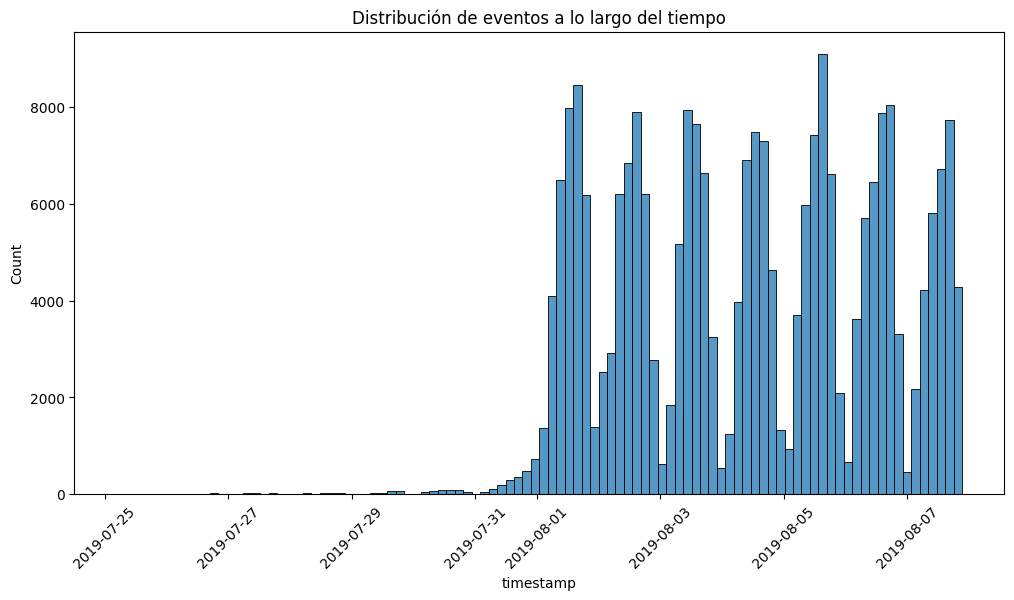

In [7]:
# Visualizar distribución de eventos por fecha
plt.figure(figsize=(12, 6))
sns.histplot(data['timestamp'], bins=100)
plt.title("Distribución de eventos a lo largo del tiempo")
plt.xticks(rotation=45)
plt.show()


<div class="alert alert-block alert-success">
<b>Celda [7]</b> <a class="tocSkip"></a>
La visualización de eventos a lo largo del tiempo es útil para identificar el inicio real del experimento. Filtrar desde el 1 de agosto mejora la validez del análisis.</div>


En el gráfico se observa que los eventos no se estabilizan hasta el 1 de agosto, esto puede indicar que este día se comenzó la prueba de ofertas y los dias anteriores están modificando los datos. Se deben filtrar los datos y comarar las métricas con la exploración inicial.

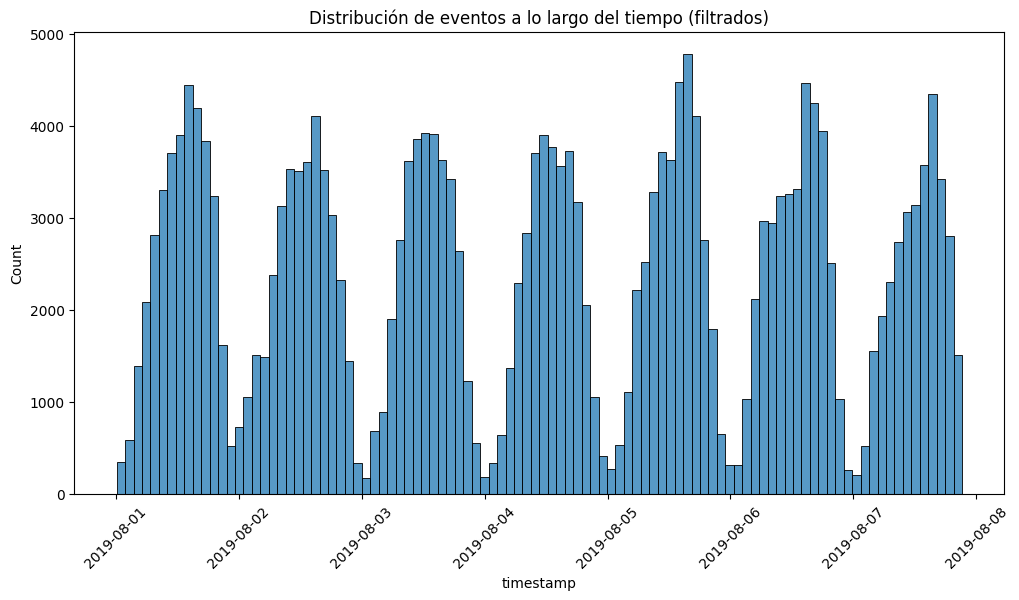

In [46]:
#filtrar datos desde la fecha que se estabilizan los pedidos
df_filtered = data[data['timestamp'] >= '2019-08-01']

# Visualizar distribución de eventos por fecha de datos filtrados
plt.figure(figsize=(12, 6))
sns.histplot(df_filtered['timestamp'], bins=100)
plt.title("Distribución de eventos a lo largo del tiempo (filtrados)")
plt.xticks(rotation=45)
plt.show()


<div class="alert alert-block alert-warning">
<b>Celda [46]</b> <a class="tocSkip"></a>
El filtro <code>df_filtered = data[data['timestamp'] >= '2019-08-01']</code> puede incluir registros justo al inicio del día sin diferenciar la hora.  
Si deseas filtrar exactamente desde el inicio del experimento, podrías hacer:

<code>
df_filtered = data[data['timestamp'] >= pd.Timestamp('2019-08-01 00:00:00')]
</code>

Esto garantiza que no se excluyan datos relevantes por error.</div>


In [47]:
#Comparar cuantos usuarios hay y de que grupos son ya filtrados
print("Número total de eventos:", df_filtered['event_name'].count())
print("Número total de usuarios únicos:", df_filtered['device_id'].nunique())
print("Eventos promedio por usuario:", df_filtered['event_name'].count() / df_filtered['device_id'].nunique())
print("Periodo de tiempo:", df_filtered['event_date'].min(), " - ", df_filtered['event_date'].max())
print('Usuarios por experimento:')
print(df_filtered["exp_id"].value_counts())

Número total de eventos: 240887
Número total de usuarios únicos: 7534
Eventos promedio por usuario: 31.97332094504911
Periodo de tiempo: 2019-08-01 00:00:00  -  2019-08-07 00:00:00
Usuarios por experimento:
248    84563
246    79302
247    77022
Name: exp_id, dtype: int64


En comparación con los datos que incluyen fechas anteriores, en los datos filtrados tenemos 7,534 usuarios, es decir sí se excluyen algunos usuarios. El numero de eventos se redujo de 243,713 a 240,887 y el promedio de eventos por usuario se quedo prácticamente igual. También es importante notar que se cuenta con suficientes datos de cada experimento, por lo que podemos proceder con el análisis con los datos filtrados.

## Embudo de eventos

Para el análisis del embudo, primero debemos ver qué valores hay en esta categoría y cuantas veces aparece cada evento.

In [19]:
# Contar la cantidad de eventos únicos
event_counts = df_filtered["event_name"].value_counts()

# Mostrar los eventos
event_counts


MainScreenAppear           117328
OffersScreenAppear          46333
CartScreenAppear            42303
PaymentScreenSuccessful     33918
Tutorial                     1005
Name: event_name, dtype: int64

Visualizamos aquí el conteo de eventos que hay en el embudo. Podemos ver que la pantalla principal es la fase con mayor incidencia, después mostrar la oferta, el carrito y la confirmación de compra. El evento con menos incidencias es el tutorial, podría ser porque gran parte de los clientes no lo necesita y es por esto que no es parte del embudo real. A continuación se crea un data frame con el embudo y su conversión al siguiente paso.

In [20]:
# Contar usuarios únicos en cada etapa del embudo
funnel_stages = {
    "MainScreenAppear": df_filtered[df_filtered["event_name"] == "MainScreenAppear"]["device_id"].nunique(),
    "OffersScreenAppear": df_filtered[df_filtered["event_name"] == "OffersScreenAppear"]["device_id"].nunique(),
    "CartScreenAppear": df_filtered[df_filtered["event_name"] == "CartScreenAppear"]["device_id"].nunique(),
    "PaymentScreenSuccessful": df_filtered[df_filtered["event_name"] == "PaymentScreenSuccessful"]["device_id"].nunique()
}

# Convertir en DataFrame para mejor visualización
funnel_df = pd.DataFrame.from_dict(funnel_stages, orient="index", columns=["Unique Users"])

# Calcular tasas de conversión entre etapas
funnel_df["Conversion Rate (%)"] = funnel_df["Unique Users"].pct_change().fillna(1) * 100
funnel_df["Next Step Conversion (%)"] = (funnel_df["Unique Users"] / funnel_df["Unique Users"].shift(1)).fillna(1) * 100


# Mostrar resultados
funnel_df


,Unique Users,Conversion Rate (%),Next Step Conversion (%)
MainScreenAppear,7419,100.000000,100.000000
OffersScreenAppear,4593,-38.091387,61.908613
CartScreenAppear,3734,-18.702373,81.297627
PaymentScreenSuccessful,3539,-5.222282,94.777718


<div class="alert alert-block alert-success">
<b>Celda [20]</b> <a class="tocSkip"></a>
El análisis del embudo es correcto y bien estructurado. Se identifican las tasas de conversión, resaltando el punto crítico donde más usuarios abandonan la compra.</div>


<div class="alert alert-block alert-warning">
<b>Celda [20]</b> <a class="tocSkip"></a>
Considera visualizar el embudo con `seaborn.barplot()` para representar gráficamente las tasas de conversión:

<code>
plt.figure(figsize=(10,5))  
sns.barplot(x=funnel_df.index, y=funnel_df['Unique Users'], color="blue")  
plt.title("Usuarios en cada etapa del embudo")  
plt.show()
</code>

Esto facilitaría la interpretación de los resultados.</div>


Partimos de la página principal con el 100% de los usuarios, después se va reduciendo el numero de usuarios que avanzan en el embudo. El 62% pasan a la oferta en pantalla, de los cuales el 81% pasa a su carrito de compra, de los cuales el 94% completa su pedido.
La etapa que pierde más usuarios es de la primera a la segunda, con una pérdida del 38.09%.

In [24]:
# Contar la frecuencia de cada evento y ordenarlos
event_frequencies = df_filtered["event_name"].value_counts().reset_index()
event_frequencies.columns = ["event_name", "count"]

# Contar la cantidad de usuarios únicos que realizaron cada evento
unique_users_per_event = df_filtered.groupby("event_name")["device_id"].nunique().reset_index()
unique_users_per_event.columns = ["event_name", "unique_users"]

# Calcular la proporción de usuarios que realizaron cada acción
unique_users_per_event['user_proportion'] = (unique_users_per_event["unique_users"] / (df_filtered["device_id"].nunique())) * 100

# Unir tablas para ver frecuencia y usuarios 
event_analysis = event_frequencies.merge(unique_users_per_event, on="event_name")

# Ordenar 
event_analysis = event_analysis.sort_values(by="unique_users", ascending=False)

display(event_analysis)


,event_name,count,unique_users,user_proportion
0,MainScreenAppear,117328,7419,98.473586
1,OffersScreenAppear,46333,4593,60.963632
2,CartScreenAppear,42303,3734,49.561986
3,PaymentScreenSuccessful,33918,3539,46.973719
4,Tutorial,1005,840,11.149456


En este análisis de los eventos vemos en qué proporcion los usuarios totales pasaron por cada etapa. 98.5% utilizaron la pagina principal, 60% vieron la oferta, 49% vieron su carrito de compra y 46% de los usuarios totales hicieron una compra. Sólamente 11% de los usuarios utilizó el tutorial. 

## Resultados del experimento

### Comparar grupos de control

Primero, para analizar la significancia de la prueba, es necesariocomparar los grupos control (246 y 247) por lo que se debe calcular cuántos usuarios únicos hay en cada grupo experimental.


In [26]:
# Contar la cantidad de usuarios únicos en cada grupo 
users_per_group = df_filtered.groupby("exp_id")["device_id"].nunique().reset_index()
users_per_group.columns = ["exp_id", "unique_users"]

display(users_per_group)


,exp_id,unique_users
0,246,2484
1,247,2513
2,248,2537


Los tres grupos tienen un número similar de usuarios, lo cual es bueno porque significa que la aleatorización probablemente funcionó bien y que se pueden comparar las muestras.

Ahora, hay que verificar si los grupos de control (246 y 247) tienen diferencias significativas.

1. Elegimos un evento popular (por ejemplo, MainScreenAppear).
2. Vemos cuántos usuarios en cada grupo realizaron ese evento.
3. Comparamos usando una prueba estadística para ver si hay diferencias significativas.

In [30]:
# Elegimos un evento clave, por ejemplo, 'MainScreenAppear'
event_name = "MainScreenAppear"

# Contar usuarios únicos que realizaron el evento en cada grupo de control (246 y 247)
users_246 = df_filtered[(df_filtered["exp_id"] == 246) & (df_filtered["event_name"] == event_name)]["device_id"].nunique()
users_247 = df_filtered[(df_filtered["exp_id"] == 247) & (df_filtered["event_name"] == event_name)]["device_id"].nunique()

# Total de usuarios en cada grupo
total_246 = users_per_group[users_per_group["exp_id"] == 246]["unique_users"].values[0]
total_247 = users_per_group[users_per_group["exp_id"] == 247]["unique_users"].values[0]

# Crear tabla de contingencia
contingency_table = [[users_246, total_246 - users_246], 
                     [users_247, total_247 - users_247]]

# Aplicar prueba chi-cuadrado
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Mostrar resultado
print(f"Usuarios con {event_name} en 246: {users_246}, en 247: {users_247}")
print(f"Valor p: {p_value}")

if p_value < 0.05:
    print("Hay una diferencia significativa entre los grupos de control. Puede haber un problema.")
else:
    print("No hay diferencia significativa entre los grupos de control. Todo está bien para el experimento.")


Usuarios con MainScreenAppear en 246: 2450, en 247: 2476
Valor p: 0.8494566142966455
No hay diferencia significativa entre los grupos de control. Todo está bien para el experimento.


El valor p = 0.849 es mucho mayor que 0.05, lo que significa que no hay una diferencia significativa entre los grupos de control. Podemos confiar en que los usuarios fueron asignados de manera aleatoria y que cualquier diferencia que encontremos en el grupo de prueba (248) será debido al cambio en las fuentes y no a problemas en la prueba.

### Comparar grupo de prueba con los grupos de control

Ahora vamos a verificar si el grupo de prueba tiene diferencias con los grupos de control, con el mismo proceso de la comparacion entre 246 y 247. Para hacer más eficiente el código, se definirá una función que nos ayude a analizar las diferencias en todos los eventos.

In [44]:
def analizar_evento(df, event_name):
    # Contar usuarios únicos que realizaron el evento en cada grupo
    users_246 = df_filtered[(df_filtered["exp_id"] == 246) & (df_filtered["event_name"] == event_name)]["device_id"].nunique()
    users_247 = df_filtered[(df_filtered["exp_id"] == 247) & (df_filtered["event_name"] == event_name)]["device_id"].nunique()
    users_248 = df_filtered[(df_filtered["exp_id"] == 248) & (df_filtered["event_name"] == event_name)]["device_id"].nunique()

    # Total de usuarios en cada grupo
    total_246 = df_filtered[df_filtered["exp_id"] == 246]["device_id"].nunique()
    total_247 = df_filtered[df_filtered["exp_id"] == 247]["device_id"].nunique()
    total_248 = df_filtered[df_filtered["exp_id"] == 248]["device_id"].nunique()


    # Verificar si los dos grupos de control son similares
    contingency_table_control = [[users_246, total_246 - users_246], 
                                 [users_247, total_247 - users_247]]
    _, p_value_control, _, _ = chi2_contingency(contingency_table_control)

    print(f"Análisis del evento: {event_name}")
    print(f"Usuarios con {event_name} en 246: {users_246}, en 247: {users_247}, en 248: {users_248}")
    
    if p_value_control < 0.05:
        print("Los grupos de control NO son equivalentes. Puede haber un problema.")
    else:
        print("Los grupos de control son equivalentes. Podemos continuar con la comparación con el grupo de prueba.")
    
    # Comparar el grupo de prueba con los controles combinados
    users_control = users_246 + users_247
    total_control = total_246 + total_247
    
    contingency_table = [[users_control, total_control - users_control], 
                         [users_248, total_248 - users_248]]
    _, p_value_experiment, _, _ = chi2_contingency(contingency_table)

    print(f"Valor p entre grupo de prueba y controles: {p_value_experiment}")
    
    if p_value_experiment < 0.05:
        print("Hay una diferencia significativa con el grupo de prueba. El cambio de fuentes podría estar afectando.")
    else:
        print("No hay diferencia significativa con el grupo de prueba. El cambio de fuentes no parece afectar.")
    
    print("*-" * 50)  # Separador visual




<div class="alert alert-block alert-success">
<b>Celda [44]</b> <a class="tocSkip"></a>
El uso de una función para comparar los grupos de prueba y control es una excelente práctica, facilitando el análisis sistemático de los eventos clave.</div>


Ahora se ejecuta la función para los eventos principales:

In [45]:
eventos_importantes = ["MainScreenAppear","OffersScreenAppear", "CartScreenAppear", "PaymentScreenSuccessful"]
for evento in eventos_importantes:
    analizar_evento(df_filtered, evento)

Análisis del evento: MainScreenAppear
Usuarios con MainScreenAppear en 246: 2450, en 247: 2476, en 248: 2493
Los grupos de control son equivalentes. Podemos continuar con la comparación con el grupo de prueba.
Valor p entre grupo de prueba y controles: 0.3423996534801834
No hay diferencia significativa con el grupo de prueba. El cambio de fuentes no parece afectar.
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Análisis del evento: OffersScreenAppear
Usuarios con OffersScreenAppear en 246: 1542, en 247: 1520, en 248: 1531
Los grupos de control son equivalentes. Podemos continuar con la comparación con el grupo de prueba.
Valor p entre grupo de prueba y controles: 0.44908322853530325
No hay diferencia significativa con el grupo de prueba. El cambio de fuentes no parece afectar.
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Análisis del evento: CartScreenAppear
Usuarios con CartSc

<div class="alert alert-block alert-warning">
<b>Celda [45]</b> <a class="tocSkip"></a>
Podrías hacer que la función <code>analizar_evento()</code> retorne un DataFrame en lugar de solo imprimir los valores. Esto permitiría visualizar los resultados más claramente:

<code>
def analizar_evento(df, event_name):
    ...
    return pd.DataFrame({
        "Evento": [event_name],
        "Usuarios Control": [users_control],
        "Usuarios Prueba": [users_248],
        "Valor p": [p_value_experiment]
    })

resultados = pd.concat([analizar_evento(df_filtered, e) for e in eventos_importantes])  
display(resultados)
</code>

Esto facilita la revisión de los valores sin depender de la salida de consola.</div>


Como se observa en el resultado de la función, no hay diferencias significativas en ninguno de los eventos clave entre los grupos de control y el grupo de prueba y el cambio de fuentes no afectó el comportamiento de los usuarios en ninguna etapa del embudo de ventas. Los grupos de control eran equivalentes, por lo que el experimento estuvo bien diseñado y podemos confiar en los resultados.



El nivel de significancia estándar en pruebas de hipótesis suele ser 0.05 (5%), lo que significa que hay un 5% de probabilidad de cometer un error tipo I (rechazar la hipótesis nula cuando es verdadera).

En este análisis, no especificamos un nivel de significancia explícito, pero como ningún valor p estuvo cerca de 0.05, podemos asumir que el umbral de 0.05 es razonable.

## Conclusiones

Hemos realizado 4 pruebas estadísticas, una por cada evento clave:
1. MainScreenAppear
2. OffersScreenAppear
3. CartScreenAppear
4. PaymentScreenSuccessful

Cada prueba compara el grupo de prueba (248) con los grupos de control (246 + 247).

Si hubiéramos usado un nivel de significancia de 0.1 (10%), habría una probabilidad de:

4 × 0.1 = 0.4

de obtener al menos un falso positivo por azar (40% de riesgo).

Para evitar falsos positivos en múltiples pruebas, podríamos aplicar corrección de Bonferroni dividiendo el nivel de significancia entre el número de pruebas (4) 

0.05 / 4 = 0.0125.


Esto haría que solo consideremos significativas las diferencias con un p-valor menor a 0.0125.


<div class="alert alert-block alert-success">
<b>Sección de Conclusión</b> <a class="tocSkip"></a>
Las conclusiones son bien argumentadas y justificadas con pruebas estadísticas. Se explican las implicaciones comerciales del experimento.</div>


Dado que todos los valores p son bastante altos (muy por encima de 0.05), no hay necesidad de ajustar la significancia. Incluso con una corrección más estricta, nuestras conclusiones seguirían siendo las mismas.

Es decir, en conclusión, mantener un nivel de significancia del 5% (0.05) es suficiente. El cambio de fuentes no afecta el comportamiento de los usuarios. Dado que las nuevas fuentes no afectan negativamente la interacción de los usuarios, se pueden implementar sin riesgo.

Si la empresa quiere profundizar más, podría segmentar los datos (por dispositivo, edad, país) para ver si hay efectos en grupos específicos, hacer otro experimento con un diseño más agresivo (cambios en diseño + colores + botones o hacer un análisis de tiempos de sesión para ver si el diseño afecta cuánto tiempo pasan los usuarios en la app.

<div class="alert alert-block alert-success">
<b>Comentario Final</b> <a class="tocSkip"></a>

¡Excelente trabajo en este análisis de comportamiento del usuario! 👏  

✅ **Limpieza de datos eficiente**: Eliminaste duplicados, corregiste nombres de columnas y transformaste los datos correctamente para su análisis.  
✅ **Análisis exploratorio sólido**: Identificaste la cantidad de eventos y usuarios únicos, además de validar la estabilidad de los datos antes del experimento.  
✅ **Embudo de conversión bien estructurado**: Calculaste tasas de conversión de manera precisa y detectaste el punto con mayor abandono de usuarios.  
✅ **Uso correcto de pruebas estadísticas**: Aplicaste la prueba chi-cuadrado de forma adecuada para validar la aleatorización y evaluar el impacto del experimento.  
✅ **Conclusiones bien fundamentadas**: Explicaste claramente los resultados y propusiste mejoras para futuros experimentos.  

Con pequeños ajustes en la optimización del código, este análisis se vuelve aún más sólido y profesional. ¡Sigue así! 🚀  

</div>
